In [2]:
import pandas as pd
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [4]:
# Red is the prediction, blue is the adj closing price 
def dense(name,n):
  df= pd.read_csv(name, index_col="Date")
  df.drop(['Open','High','Low',"Close",'Volume'],axis=1,inplace=True)
  length=len(df)
  sc=MinMaxScaler()
  training_set=df.iloc[:int(length*0.8),:]
  training_set=sc.fit_transform(training_set)
  training_length=len(training_set)
  #using first 80% of the data to train the model, parameters are the adj_closing price of previous days
  period=2
  x_train=[]
  y_train=[]
  x_test=[]
  y_test=[]
  for i in range(period,training_length):
          x_train.append(training_set[i-period:i])
          y_train.append(training_set[i])
      
  x_train=np.array(x_train)
  x_train=np.reshape(x_train,(x_train.shape[0],1,period))
  y_train=np.array(y_train)

  length=len(df)
  test_set=df.iloc[int(0.8*length):-1,:]
  test_length=len(test_set)
  test_set=sc.fit_transform(test_set)
  for i in range(period,test_length):
          x_test.append(test_set[i-period:i])
          y_test.append(df.iloc[[i+int(0.8*length)],:])
  x_test=np.array(x_test)
  x_test=np.reshape(x_test,(x_test.shape[0],1,period))
  y_test=np.array(y_test)
  y_test=np.reshape(y_test,(y_test.shape[0]))
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(units=5, input_shape=(1,period), activation='relu'))
  model.add(keras.layers.Dense(units=5, activation='relu'))
  model.add(keras.layers.Dense(units=1, activation='linear'))
  model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy','mean_absolute_error'])

  model.fit(x_train,y_train,epochs=40,batch_size=5,verbose=0)
  plt.figure(figsize=(10,10))
  plt.subplot(2,2,n)
  y_pred=model.predict(x_test)

  x_train=np.reshape(x_train,(x_train.shape[0],period))
  plt.plot(y_test,color='b')
  y_pred=np.reshape(y_pred,(x_test.shape[0],1))
  y_pred=sc.inverse_transform(y_pred)
  plt.plot(y_pred,color='r')
  print(r2_score(y_test,y_pred[:,0]))

In [5]:
from sklearn.linear_model import LinearRegression
def linear(name,n):
  df= pd.read_csv(name, index_col="Date")
  df.drop(['Open','High','Low',"Close",'Volume'],axis=1,inplace=True)

  length=len(df)
  sc=MinMaxScaler()
  training_set=df.iloc[:int(length*0.8),:]
  training_set=sc.fit_transform(training_set)
  training_length=len(training_set)
  #using first 80% of the data to train the model, parameters are the adj_closing price of previous days
  period=4
  x_train=[]
  y_train=[]
  x_test=[]
  y_test=[]
  for i in range(period,training_length):
          x_train.append(training_set[i-period:i])
          y_train.append(training_set[i])
      
  x_train=np.array(x_train)
  x_train=np.reshape(x_train,(x_train.shape[0],period))
  y_train=np.array(y_train)

  length=len(df)
  test_set=df.iloc[int(0.8*length):-1,:]
  test_length=len(test_set)
  test_set=sc.fit_transform(test_set)
  for i in range(period,test_length):
          x_test.append(test_set[i-period:i])
          y_test.append(df.iloc[[i+int(0.8*length)],:])
  x_test=np.array(x_test)
  x_test=np.reshape(x_test,(x_test.shape[0],period))
  y_test=np.array(y_test)
  y_test=np.reshape(y_test,(y_test.shape[0]))
  model = LinearRegression().fit(x_train,y_train)
  plt.figure(figsize=(10,10))
  plt.subplot(2,2,n)
  y_pred=model.predict(x_test)

  x_train=np.reshape(x_train,(x_train.shape[0],period))
  plt.plot(y_test,color='b')
  y_pred=np.reshape(y_pred,(x_test.shape[0],1))
  y_pred=sc.inverse_transform(y_pred)
  plt.plot(y_pred,color='r')
  print(r2_score(y_test,y_pred[:,0]))
  print (y_train.shape)


In [6]:
import copy
def best(name,n):
  df= pd.read_csv(name, index_col="Date")
  df.drop(['Open','High','Low',"Close",'Volume'],axis=1,inplace=True)

  length=len(df)
  y_true=df["Adj Close"]
  y_pred=copy.deepcopy(y_true)
  for i in range(len(y_true)-1,0,-1):
    y_pred[i]=y_true[i-1]
  plt.figure(figsize=(20,10))
  plt.subplot(2,2,n)
  plt.plot(y_true[1:],color='b')
  plt.plot(y_pred[1:],color='r')

  print(r2_score(y_true,y_pred))

In [7]:
from xgboost import XGBRegressor
def xg(name,n):
  df= pd.read_csv(name, index_col="Date")
  df.drop(['Open','High','Low',"Close",'Volume'],axis=1,inplace=True)

  length=len(df)
  sc=MinMaxScaler()
  training_set=df.iloc[:int(length*0.8),:]
  training_set=sc.fit_transform(training_set)
  training_length=len(training_set)
  #using first 80% of the data to train the model, parameters are the adj_closing price of previous days
  period=2
  x_train=[]
  y_train=[]
  x_test=[]
  y_test=[]
  for i in range(period,training_length):
          x_train.append(training_set[i-period:i])
          y_train.append(training_set[i])
      
  x_train=np.array(x_train)
  x_train=np.reshape(x_train,(x_train.shape[0],period))
  y_train=np.array(y_train)

  length=len(df)
  test_set=df.iloc[int(0.8*length):-1,:]
  test_length=len(test_set)
  test_set=sc.fit_transform(test_set)
  for i in range(period,test_length):
          x_test.append(test_set[i-period:i])
          y_test.append(df.iloc[[i+int(0.8*length)],:])
  x_test=np.array(x_test)
  x_test=np.reshape(x_test,(x_test.shape[0],period))
  y_test=np.array(y_test)
  y_test=np.reshape(y_test,(y_test.shape[0]))
  model = XGBRegressor(verbosity=0).fit(x_train,y_train)
  plt.figure(figsize=(10,10))
  plt.subplot(2,2,n)
  y_pred=model.predict(x_test)

  x_train=np.reshape(x_train,(x_train.shape[0],period))
  plt.plot(y_test,color='b')
  y_pred=np.reshape(y_pred,(x_test.shape[0],1))
  y_pred=sc.inverse_transform(y_pred)
  plt.plot(y_pred,color='r')
  print(r2_score(y_test,y_pred[:,0]))


In [8]:
def ltsm(name,n):
  df= pd.read_csv(name, index_col="Date")
  df.drop(['Open','High','Low',"Close",'Volume'],axis=1,inplace=True)
  length=len(df)

  sc=MinMaxScaler()
  training_set=df.iloc[:int(length*0.8),:]
  training_set=sc.fit_transform(training_set)
  training_length=len(training_set)
  #using first 80% of the data to train the model, parameters are the adj_closing price of previous days
  period=2
  x_train=[]
  y_train=[]
  x_test=[]
  y_test=[]
  for i in range(period,training_length):
          x_train.append(training_set[i-period:i])
          y_train.append(training_set[i])
      
  x_train=np.array(x_train)
  y_train=np.array(y_train)

  length=len(df)
  test_set=df.iloc[int(0.8*length):-1,:]
  test_length=len(test_set)
  test_set=sc.fit_transform(test_set)
  for i in range(period,test_length):
          x_test.append(test_set[i-period:i])
          y_test.append(df.iloc[[i+int(0.8*length)],:])
  x_test=np.array(x_test)
  y_test=np.array(y_test)
  y_test=np.reshape(y_test,(y_test.shape[0]))
  model = keras.models.Sequential()
  model.add(keras.layers.LSTM(units=14, input_shape=(period,1),return_sequences=True))
  model.add(keras.layers.Dropout(0.2))
  # model.add(keras.layers.LSTM(units=10, activation='relu',return_sequences=True))
  # model.add(keras.layers.Dropout(0.2))
  # model.add(keras.layers.LSTM(units=5,return_sequences=True))
  model.add(keras.layers.LSTM(units=1, activation='linear'))
  model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy','mean_squared_error'])
  model.fit(x_train,y_train,epochs=30,batch_size=4,validation_split=0.005,verbose=0)
  plt.figure(figsize=(10,10))
  plt.figure(figsize=(10,10))
  plt.subplot(2,2,n)
  plt.plot(y_test,color='b')
  y_pred=model.predict(x_test)
  y_pred=np.reshape(y_pred,(x_test.shape[0],1))
  y_pred=sc.inverse_transform(y_pred)
  plt.plot(y_pred,color='r')
  print(r2_score(y_test,y_pred[:,0]))

Score of the given four companies is:
0.9718138390457576
0.7375921180005574
0.9754468156157116
0.9236041436313428


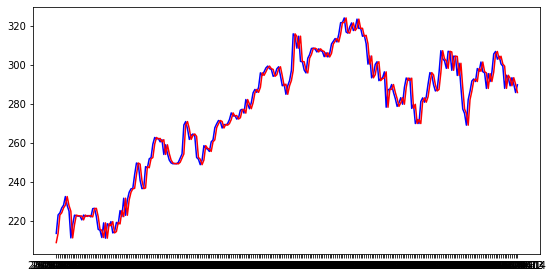

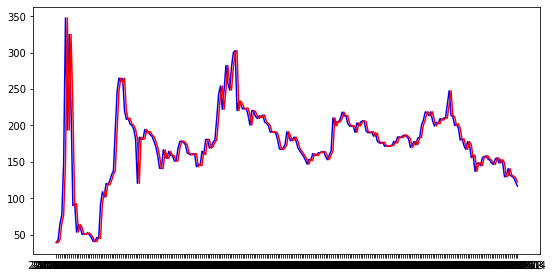

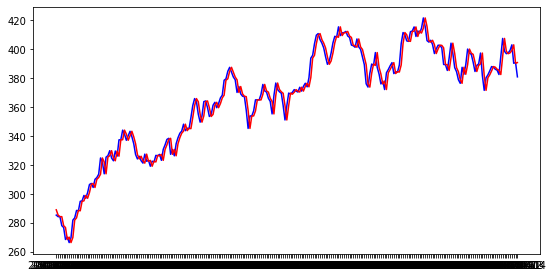

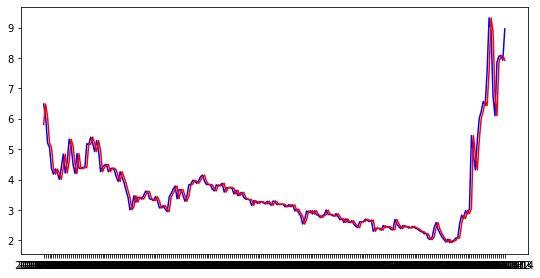

In [10]:
print("Score of the given four companies is:")
best("/content/FB2A.BE.csv",1)
best("/content/GME.csv",2)
best("/content/GS.csv",3)
best("/content/RELI.csv",4)
